## Data Exploring

* Input file: Historical Product Demand.csv 


* Description: CSV data file containing product demand for encoded product id's


* Size of Data: (1048575, 5)


* Features: Product_Code, Warehouse, Product_Category, Date, Order_Demand


* Period: 2011-01-08 ~ 2017-01-09

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Historical Product Demand.csv')

In [3]:
df.shape

(1048575, 5)

In [4]:
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [5]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [6]:
df.isna().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [7]:
#Drop na's.

#Since the number of missing values are about 1%, I am taking an 'executive decision' of removing them. ;) 
df.dropna(axis=0, inplace=True) #remove all rows with na's.
df.reset_index(drop=True)
df.sort_values('Date')[10:20] #Some of the values have () in them.

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44795,Product_0965,Whse_A,Category_006,2011/11/18,1
44796,Product_0965,Whse_A,Category_006,2011/11/21,3
44797,Product_0965,Whse_A,Category_006,2011/11/21,5
44798,Product_0965,Whse_A,Category_006,2011/11/21,2
119561,Product_0980,Whse_A,Category_028,2011/11/21,100
107158,Product_0138,Whse_J,Category_007,2011/11/22,188
107159,Product_0138,Whse_J,Category_007,2011/11/22,1852
111727,Product_0982,Whse_A,Category_028,2011/11/22,3700
44102,Product_0980,Whse_A,Category_028,2011/11/23,1000
71915,Product_0980,Whse_A,Category_028,2011/11/23,200


In [8]:
print("The Number of unique")
print('-----------------------------')
print('Product code:\t', df.Product_Code.nunique())
print('Category:\t', df.Product_Category.nunique())
print('Warehouse:\t', df.Warehouse.nunique())

The Number of unique
-----------------------------
Product code:	 2160
Category:	 33
Warehouse:	 4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1037336 non-null  object
 1   Warehouse         1037336 non-null  object
 2   Product_Category  1037336 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1037336 non-null  object
dtypes: object(5)
memory usage: 47.5+ MB


In [10]:
#Target Feature - Order_Demand
#Removing () from the target feature.
df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")

#Next step is to change the data type.
df['Order_Demand'] = df['Order_Demand'].astype('int64')

C:\Users\7info\AppData\Local\Temp\ipykernel_7884\1192901098.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
C:\Users\7info\AppData\Local\Temp\ipykernel_7884\1192901098.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")


In [11]:
# Convert to datetime dtype.
from datetime import datetime

df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d'))

In [12]:
# Extract the data when the year correspond to 2012 ~ 2016
df = df[(df['Date']>='2012-01-01') & (df['Date']<='2016-12-31')].sort_values('Date', ascending=True)

In [13]:
df_sum = df.groupby('Date')['Order_Demand'].sum().reset_index()

In [14]:
df_sum = df_sum.set_index('Date')

In [15]:
df_sum

,Order_Demand
Date,
2012-01-01,2
2012-01-02,680277
2012-01-03,1645257
2012-01-04,1295861
2012-01-05,8941774
...,...
2016-12-26,3628370
2016-12-27,1674226
2016-12-28,2740302


## Time Series Graph

In [16]:
#Averages daily sales value for the month, 
# and we are using the start of each month as the timestamp.
#y = df_sum['Order_Demand'].resample('MS').mean()

y = df_sum['Order_Demand'].resample('W').mean()

In [18]:
y

Date
2012-01-01    2.000000e+00
2012-01-08    2.990176e+06
2012-01-15    2.760637e+06
2012-01-22    2.346257e+06
2012-01-29    1.913528e+06
                  ...     
2016-12-04    4.418891e+06
2016-12-11    3.549429e+06
2016-12-18    3.319842e+06
2016-12-25    2.913258e+06
2017-01-01    1.855267e+06
Freq: W-SUN, Name: Order_Demand, Length: 262, dtype: float64

## Decomposition

* Additive model : y(t) = Trend + Seasonality + Noise

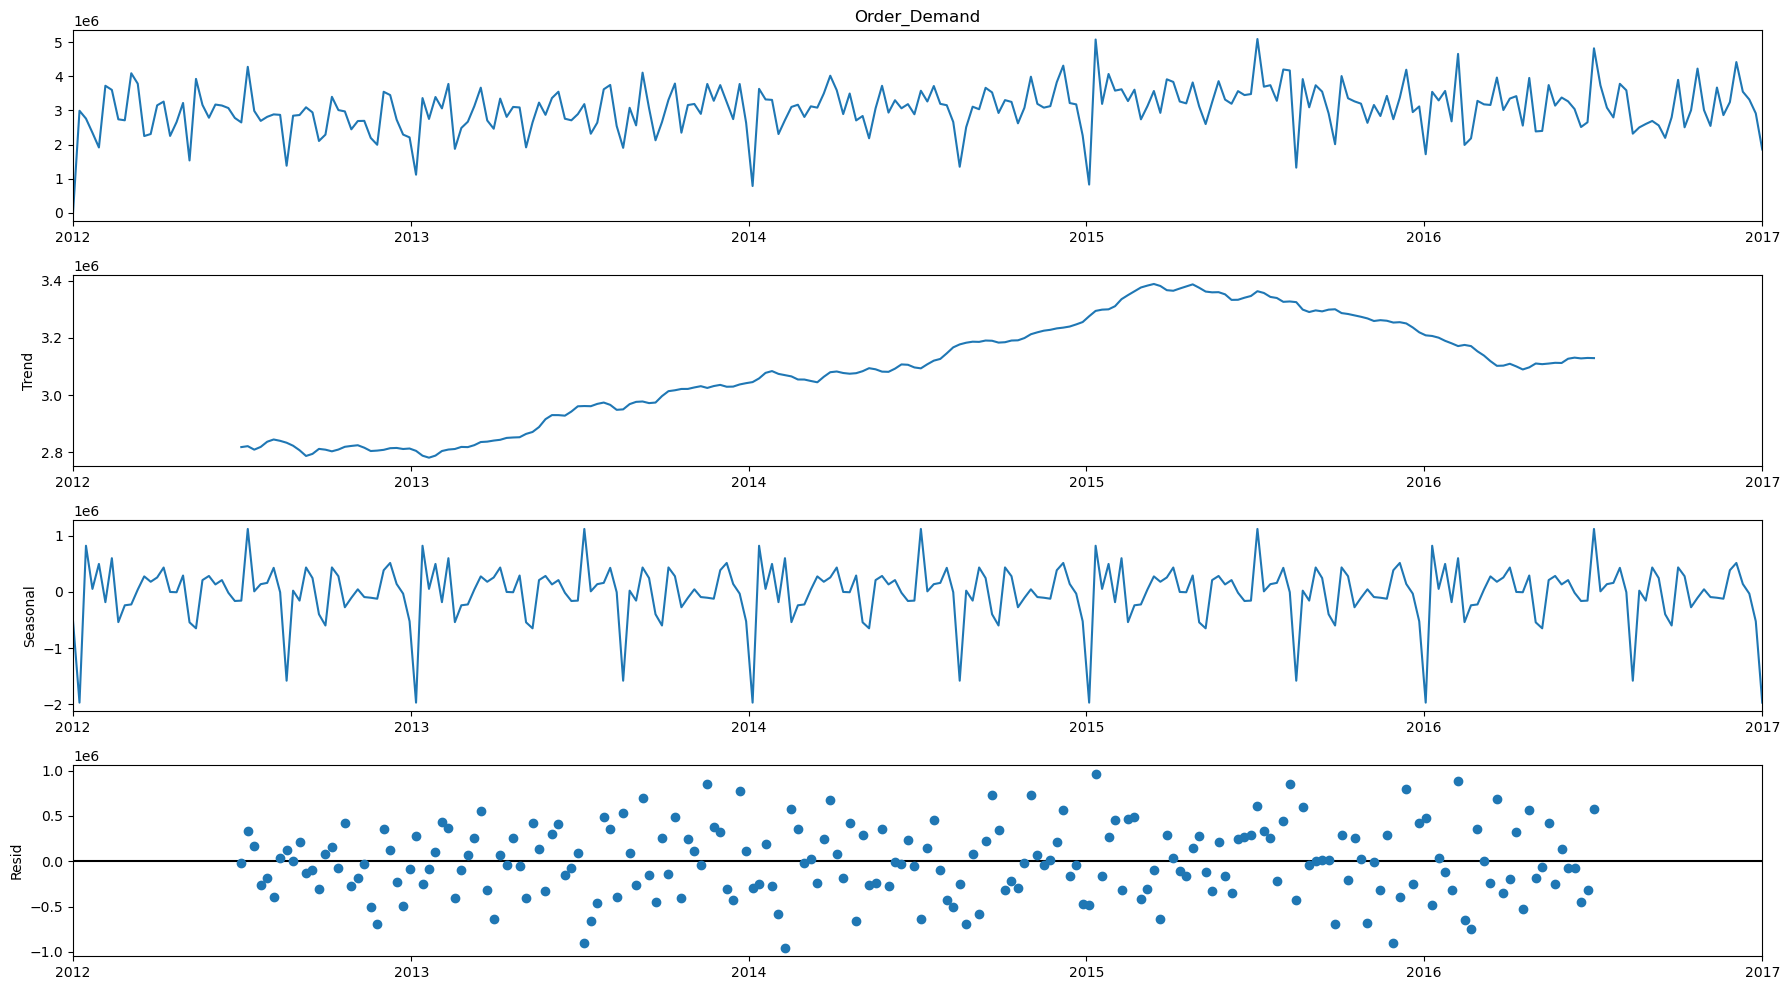

In [19]:
#The best part about time series data and decomposition is that you can break down the data into the following:
#Time Series Decomposition. 
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### EMD

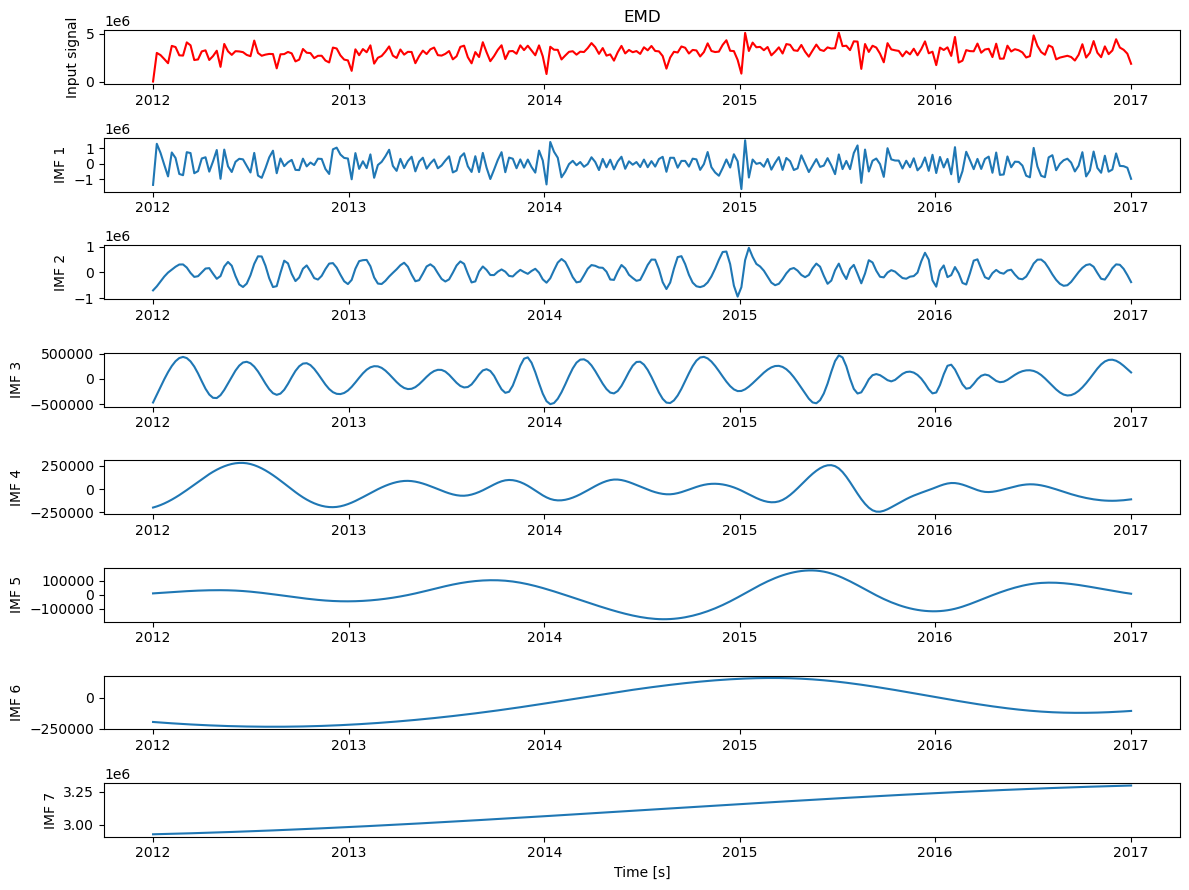

In [20]:
# EMD
from PyEMD import EMD
import numpy  as np
import pylab as plt

# Define signal
t = np.array(y.index)
s = np.array(y)

# Execute EMD on signal
IMF = EMD().emd(s,t)
nIMFs = IMF.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, s, 'r')
plt.ylabel("Input signal")
plt.title('EMD')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, IMF[n])
    plt.ylabel("IMF %i" %(n+1))
    #plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('emd_example', dpi=120)
plt.show()

In [28]:
t.shape

(262,)

In [30]:
s.shape

(262,)

In [20]:
imfs, residue = emd.get_imfs_and_residue()
plt.figure(figsize=(12,1.28))
plt.title('Residue')
plt.plot(t, residue ,'g')
plt.show()

NameError: name 'emd' is not defined

### EEMD

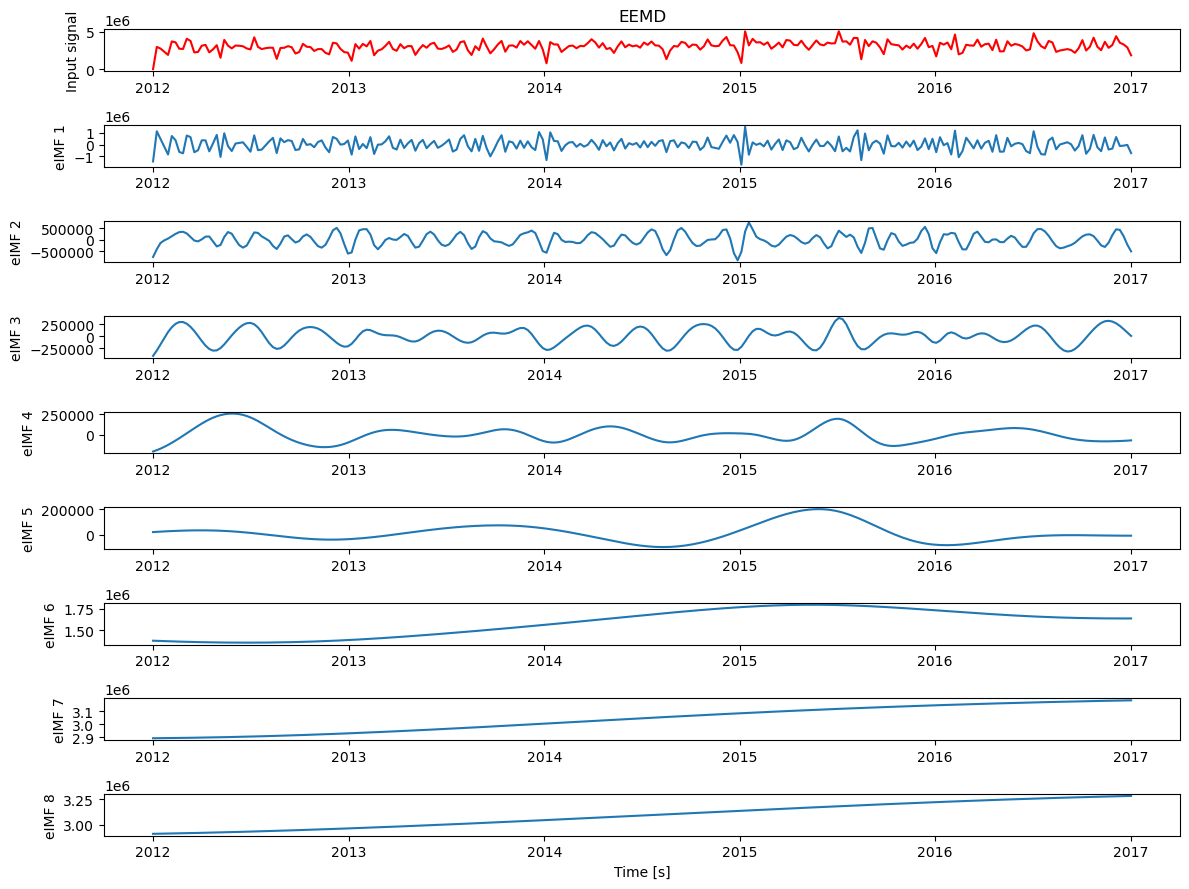

In [21]:
# EEMD
from PyEMD import EEMD
import numpy as np
import pylab as plt

# Define signal
t = np.array(y.index)

s = np.array(y)
# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on s
eIMFs = eemd.eemd(s, t)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.title("EEMD")
plt.ylabel("Input signal")
plt.plot(t, s, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n])
    plt.ylabel("eIMF %i" %(n+1))
    #plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

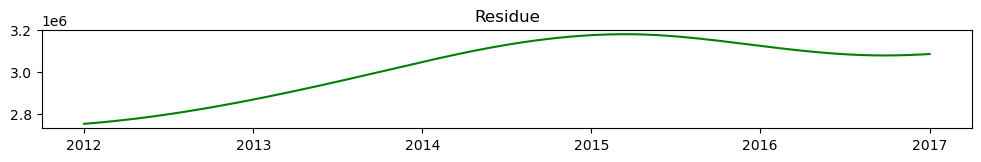

In [156]:
imfs, residue = emd.get_imfs_and_residue()
plt.figure(figsize=(12,1.28))
plt.title('Residue')
plt.plot(t, residue ,'g')
plt.show()